## Imports

In [2]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

## Preprocessing

<img src='minifashion.png'>

### Load dataset

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Data normalization

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Reshaping

In [5]:
X_train = X_train.reshape(-1, 28*28)
X_train.shape

(60000, 784)

In [6]:
X_test = X_test.reshape(-1, 28*28)
X_test.shape

(10000, 784)

## Learning

### Building MLP



In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=784, ))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1 = 0.9,beta_2 = 0.9999)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dense_10 (Dense)             (None, 200)               25800     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 200)               800       
_________________________________________________________________
dense_11 (Dense)             (None, 100)              

### Train

In [19]:
history = model.fit(X_train, y_train, batch_size=100, validation_split=0.1, epochs=100)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 5s 97us/sample - loss: 0.7159 - sparse_categorical_accuracy: 0.7498 - val_loss: 0.4353 - val_sparse_categorical_accuracy: 0.8392
Epoch 2/100
54000/54000 [==============================] - 3s 47us/sample - loss: 0.5023 - sparse_categorical_accuracy: 0.8209 - val_loss: 0.4081 - val_sparse_categorical_accuracy: 0.8458
Epoch 3/100
54000/54000 [==============================] - 3s 46us/sample - loss: 0.4638 - sparse_categorical_accuracy: 0.8355 - val_loss: 0.4152 - val_sparse_categorical_accuracy: 0.8430
Epoch 4/100
54000/54000 [==============================] - 3s 47us/sample - loss: 0.4383 - sparse_categorical_accuracy: 0.8431 - val_loss: 0.3809 - val_sparse_categorical_accuracy: 0.8542
Epoch 5/100
54000/54000 [==============================] - 3s 48us/sample - loss: 0.4271 - sparse_categorical_accuracy: 0.8470 - val_loss: 0.3682 - val_sparse_categorical_accuracy: 0.8618
Epoch 6/100

54000/54000 [==============================] - 3s 48us/sample - loss: 0.2483 - sparse_categorical_accuracy: 0.9098 - val_loss: 0.3252 - val_sparse_categorical_accuracy: 0.8903
Epoch 88/100
54000/54000 [==============================] - 3s 49us/sample - loss: 0.2492 - sparse_categorical_accuracy: 0.9086 - val_loss: 0.3290 - val_sparse_categorical_accuracy: 0.8908
Epoch 89/100
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2499 - sparse_categorical_accuracy: 0.9086 - val_loss: 0.3376 - val_sparse_categorical_accuracy: 0.8825
Epoch 90/100
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2523 - sparse_categorical_accuracy: 0.9069 - val_loss: 0.3240 - val_sparse_categorical_accuracy: 0.8883
Epoch 91/100
54000/54000 [==============================] - 3s 51us/sample - loss: 0.2472 - sparse_categorical_accuracy: 0.9106 - val_loss: 0.3322 - val_sparse_categorical_accuracy: 0.8892
Epoch 92/100
54000/54000 [==============================] - 3s 50us/

### Evaluation

In [20]:
test_loss, test_accuracy = model.evaluate(X_train, y_train, batch_size=100)
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=100)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.3699 - sparse_categorical_accuracy: 0.8742


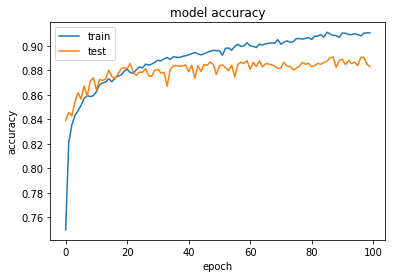

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()